In [1]:
import numpy as np 
import pandas as pd

In [2]:
train_data = pd.read_csv("E:/Spring 2019/Statistical Methods in Engineering/Project/Project work/autos.csv",encoding = "ISO-8859-1" )

In [3]:
train_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
# Dropping the columns
# 1. Seller column
train_data["seller"].value_counts()


privat        371525
gewerblich         3
Name: seller, dtype: int64

In [5]:
# As we can see only 3 values beloing to non private category, dropping the seller column
del train_data["seller"]

In [6]:
#2. Offertype column
train_data["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [7]:
# As we can see only 12 values beloing to Geush category, dropping the OfferType column
del train_data["offerType"]

In [8]:
#3. nrOfPictures column
train_data["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

In [9]:
#this column only take one value so drooping this column
del train_data["nrOfPictures"]

In [10]:
#4. Dates columns
train_data[ ["dateCrawled","dateCreated","lastSeen"] ].head()

,dateCrawled,dateCreated,lastSeen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


In [11]:
#Removing the Date columns as not much information can be gathered from these datesb
train_data = train_data.drop(["dateCrawled","dateCreated","lastSeen"] , axis=1 )

In [12]:
# NULLS 
#Finding the total number of Nulls in each column
train_data.isnull().sum()

name                       0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
dtype: int64

In [13]:
# replacing the nulls in 5 columns with appropriate values
#1. Gearbox
train_data["gearbox"].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [14]:
train_data.groupby("brand")["gearbox"].value_counts()

brand           gearbox  
alfa_romeo      manuell       2064
                automatik      146
audi            manuell      20841
                automatik    10698
bmw             manuell      25323
                automatik    13442
chevrolet       manuell       1104
                automatik      634
chrysler        automatik      753
                manuell        637
citroen         manuell       4304
                automatik      604
dacia           manuell        877
                automatik        1
daewoo          manuell        475
                automatik       33
daihatsu        manuell        667
                automatik       85
fiat            manuell       8786
                automatik      231
ford            manuell      22198
                automatik     1953
honda           manuell       2393
                automatik      318
hyundai         manuell       3091
                automatik      421
jaguar          automatik      477
                manuell      

In [15]:
gearbox = train_data["gearbox"].unique()
brand = train_data["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if train_data[(train_data.gearbox == j) & (train_data.brand == i)].shape[0] > m :
            m = train_data[(train_data.gearbox == j) & (train_data.brand == i)].shape[0]
            d[i] = j

In [16]:
for i in brand :
    train_data.loc[(train_data.brand == i) & (train_data.gearbox.isnull()) ,"gearbox" ] = d[i]

In [17]:
# No nulls in gearbox after replacement
train_data["gearbox"].isnull().sum()

0

In [18]:
#2. notRepairedDamage
train_data["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [19]:
train_data["notRepairedDamage"].isnull().sum()

72060

In [20]:
#72060 values are nans and we can see 'nein' value is more frequent than 'ja' , so we can fillna with maxFreq 
train_data["notRepairedDamage"].fillna("nein",inplace = True)

In [21]:
# No nulls now
train_data["notRepairedDamage"].isnull().sum()

0

In [22]:
#3.fuelType
train_data["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [23]:
#we can see only benzin and diesel are more frequent , for now lets fill it with benzin
train_data["fuelType"].fillna("benzin",inplace = True)

In [24]:
# no Nulls now
train_data["notRepairedDamage"].isnull().sum()

0

In [25]:
#4.vehicleType
train_data["vehicleType"].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [26]:
# we can fill according to the fuelType values
train_data.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine         51
          andere            44
          kleinwagen        29
          kombi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    kleinwagen     72531
          limousine      66300
          kombi          31350
          cabrio         20769
          coupe          15935
          bus            10795
          suv             5400
          andere          1786
cng       bus              240
          kombi            136
          kleinwagen        80
          limousine         40
          andere            14
          suv                4
          cabrio             3
          coupe              3
diesel    kombi          34848
          limousine      27648
          bus            18622
          suv             8665
          kleinwagen      6808
          coupe           2737
          cabrio          1871
          andere 

In [27]:
vehicleType = train_data["vehicleType"].unique()
fuelType = train_data["fuelType"].unique()
print(fuelType)
print(vehicleType)
#remove nan 
vehicleType = np.delete(vehicleType,0)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'andere']


In [28]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if train_data[(train_data.vehicleType == j) & (train_data.fuelType == i)].shape[0] > m :
            m = train_data[(train_data.vehicleType == j) & (train_data.fuelType == i)].shape[0]
            d[i] = j

In [29]:
for i in fuelType :
    train_data.loc[(train_data.fuelType == i) & (train_data.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [30]:
# No Nulls now
train_data["vehicleType"].isnull().sum()

0

In [31]:
#5. Model
train_data["model"].value_counts()

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ibiza                  2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

In [32]:
# There are too many unique values in Model but Golf is occuring maximum times so replacing it with most freq column
train_data["model"].fillna("golf",inplace =True)

In [33]:
# No nulls in datatset
train_data.isnull().sum()

name                   0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

In [34]:
# OULIERS Removal
#1.yearOfRegistration
train_data["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [35]:
#We can see yearOfRegistration goes from 1000 to 9999 but 50% of the values are nearby 1999
train_data[train_data.yearOfRegistration > 2017].shape

(4134, 14)

In [36]:
train_data[train_data.yearOfRegistration < 1950].shape

(289, 14)

In [37]:
#Only 289 registration are there before 1950 and 4000 registration after 2017 so these are outliers and should be removed for better results
train_data = train_data[(train_data.yearOfRegistration < 2017)  & (train_data.yearOfRegistration > 1950)]

In [38]:
#2. Price
train_data["price"].describe()

count    3.565370e+05
mean     1.739899e+04
std      3.658497e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64

In [39]:
train_data[train_data.price < 100].shape

(12372, 14)

In [40]:
train_data[train_data.price > 200000].shape

(158, 14)

In [41]:
#only 158 values are there above 2 lakh and 12000 enries below 100 so lets remove them
train_data = train_data[(train_data.price > 100) & (train_data.price < 200000) ]

In [42]:
train_data.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,70435
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,90480
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


# DATA VISUALIZATION

In [91]:
import matplotlib.pyplot as plot
import seaborn as sb
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer

Categorical Variable distribution in the dataset

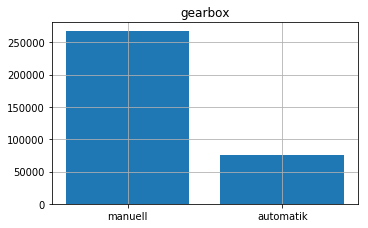

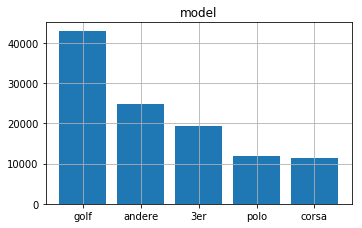

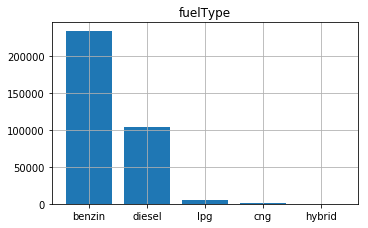

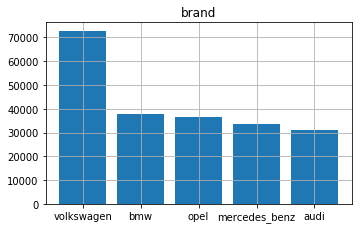

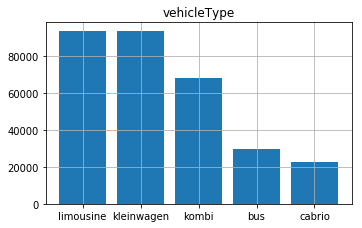

In [236]:
Categories = ['gearbox', 'model', 'fuelType', 'brand','vehicleType' ]

for i, cat in enumerate(Categories):
    v = train_data[cat].unique()
    g = train_data.groupby(by = cat )[cat].count().sort_values(ascending = False)
    r = range(min(len(v), 5))
    
    plot.figure(figsize=(5,3))
    plot.title(cat)
    plot.bar(r, g.head())
    plot.xticks(r, g.index)
    plot.grid(True)
    plot.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plot.show()

Distribution of Response Variable Price

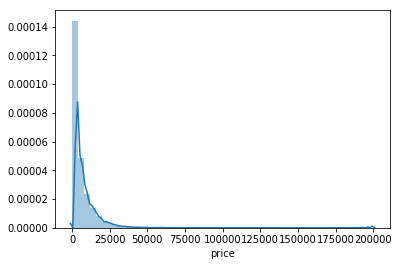

In [318]:
sb.distplot(train_data.price)
plot.show()

Correlation Matrix to find relation between dependent and independent variables

In [237]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plot.subplots( figsize =( 12 , 10 ) )
    cmap = sb.diverging_palette( 440 , 20 , as_cmap = True )
    _ = sb.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

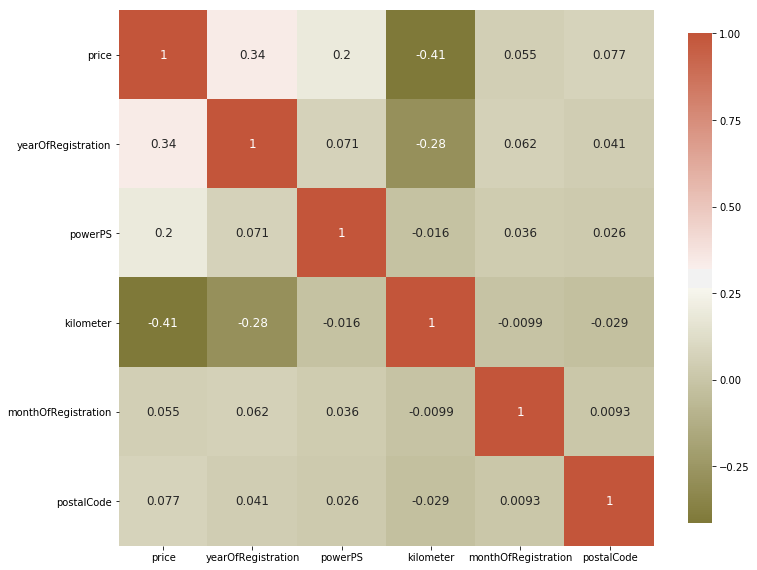

In [238]:
plot_correlation_map(train_data)
train_data.corr()
plot.show()

In [239]:
train_data.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

kilometer              0.412264
yearOfRegistration     0.338046
powerPS                0.197779
postalCode             0.077110
monthOfRegistration    0.055011
Name: price, dtype: float64

# ONE HOT ENCODING
In one-hot encoding, we create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise.To create these one-hot encoding columns, we can use the get_dummies function. I used the prefix option so we can trace back to the original column.

In [315]:
df_num = train_data[['yearOfRegistration','powerPS','kilometer']]
col_cat = ['fuelType','gearbox','vehicleType','brand','model']

In [316]:
df_cat = pd.get_dummies(train_data[col_cat],drop_first = True)

In [317]:
df_final_data =pd.concat([df_cat,df_num], axis = 1)
df_price = pd.DataFrame(train_data['price'])
df_final_data =pd.concat([df_final_data, df_price], axis = 1)

# LINEAR REGRESSION MODEL

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that we can measure how well our model would do on unseen data. We split into three parts:

Training samples: these samples are used to train the model
Test samples: these samples are held out from all decisions and are used to measure the generalized performance of the model

In this project, we will split into 80% train and 20% test.

In [228]:
X = df_final_data.drop(['price'], axis = 1)
Y = df_final_data['price']

spliting data into training and testing data set

In [229]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Fitting the linear regression model on training dataset

In [230]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predicting Price of used car in testing dataset

In [231]:
y_pred=lr.predict(X_test)

Predicted price of used cars in testing dataset

In [232]:
y_pred

array([  6759.61175766,   2046.41886856,  10637.62918104, ...,
          882.68173166,   3542.16722276,   1695.23950668])

Compare actual price and predicted price of used cars using linear regression model

In [322]:
df_lr = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred})  
df_lr.head()

,Actual_Price,Predicted_Price
141530,9900,6759.611758
334137,550,2046.418869
355153,8750,10637.629181
323599,1850,1825.575243
341931,2350,7569.793734


# FEATURE IMPORTANCE

One path for improving your models to understand what features are important to your models. This can usually only be investigated for simpler models such as Linear Regression or Random Forests. Let's get the feature importance for our models.

In [323]:
col2use = [c for c in list(df_train.columns)]
feature_importances = pd.DataFrame(lr.coef_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

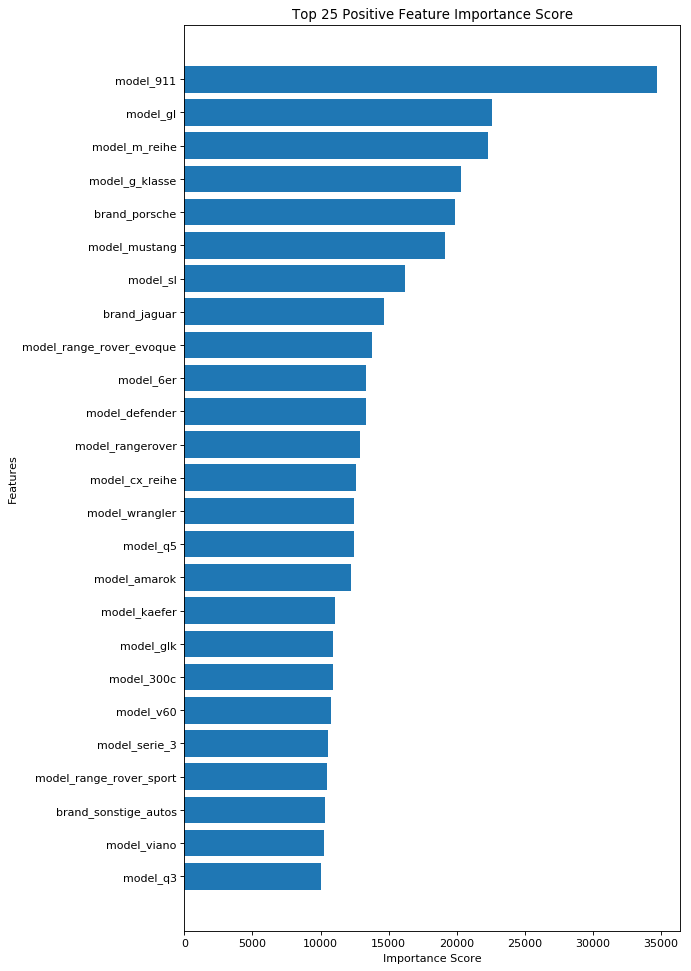

In [324]:
num= 25
ylocs = np.arange(num)
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plot.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plot.barh(ylocs, values_to_plot, align = 'center')
plot.ylabel('Features')
plot.xlabel('Importance Score')
plot.title('Top 25 Positive Feature Importance Score')
plot.yticks(ylocs, feature_labels)
plot.show()

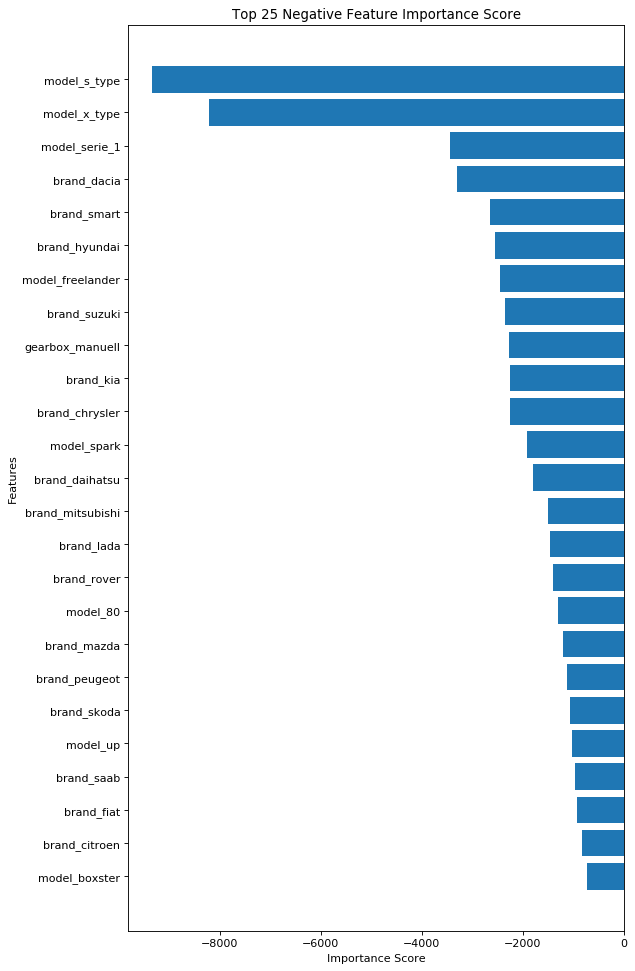

In [325]:
num = 25
ylocs = np.arange(num)
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plot.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plot.barh(ylocs, values_to_plot, align = 'center')
plot.ylabel('Features')
plot.xlabel('Importance Score')
plot.title('Top 25 Negative Feature Importance Score')
plot.yticks(ylocs, feature_labels)
plot.show()

R-squared value of a Model for training data set

In [326]:
lr.score(X_train, y_train)

0.57793852463340578

R-squared value of a Model for testing data set

In [327]:
lr.score(X_test, y_test)

0.56502807254069243

In [329]:
 y_pred_train=lr.predict(X_train)
print('Mean Absolute Error of train data:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error of train data:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error of train data:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Mean Absolute Error of test data:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error of test data:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error of test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error of train data: 2889.2054905
Mean Squared Error of train data: 29235811.2449
Root Mean Squared Error of train data: 5407.0150032
Mean Absolute Error of test data: 2931.90312569
Mean Squared Error of test data: 31774791.1002
Root Mean Squared Error of test data: 5636.91325995


Compare actual price and predicted price of used cars using linear regression model

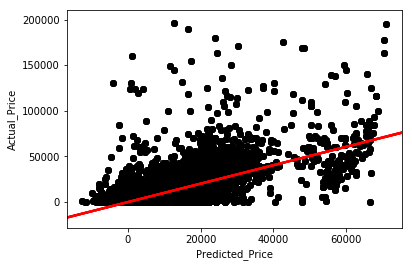

In [251]:
sb.regplot(x="Predicted_Price", y="Actual_Price", data=df_lr, scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
plot.show()